In [13]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'25',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '2ae2d495-894e-49ac-9e65-ff23d7c13406',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [14]:
type(data)

dict

In [15]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [16]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12001,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.984484e+07,1.984484e+07,False,NaN,1,NaN,NaN,None,2025-04-01T05:02:00.000Z,82999.129916,2.726916e+10,57.7684,0.023991,1.378536,-4.048968,-3.091921,-20.214373,-11.115438,1.647104e+12,61.3258,1.742982e+12,None,2025-04-01T05:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-01 05:03:29.004413
1,1027,Ethereum,ETH,ethereum,10086,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206595e+08,1.206595e+08,True,NaN,2,NaN,NaN,None,2025-04-01T05:02:00.000Z,1836.727651,1.494395e+10,30.9311,0.081336,1.697960,-10.207341,-17.424456,-42.915653,-44.922066,2.216186e+11,8.2514,2.216186e+11,None,2025-04-01T05:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-01 05:03:29.004413
2,825,Tether USDt,USDT,tether,121855,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, waves-ec...",NaN,1.439930e+11,1.478779e+11,True,NaN,3,NaN,NaN,None,2025-04-01T05:02:00.000Z,0.999807,5.748280e+10,36.7906,-0.012572,-0.005035,-0.048206,0.034956,-0.005642,0.202920,1.439652e+11,5.3602,1.478493e+11,None,2025-04-01T05:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-01 05:03:29.004413
3,52,XRP,XRP,xrp,1569,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.820570e+10,9.998630e+10,False,NaN,4,NaN,NaN,None,2025-04-01T05:02:00.000Z,2.101409,4.075012e+09,38.2178,0.167970,0.556650,-13.328146,-6.474863,-31.686591,0.096613,1.223140e+11,4.5541,2.101409e+11,None,2025-04-01T05:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-01 05:03:29.004413
4,1839,BNB,BNB,bnb,2433,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424718e+08,1.424718e+08,False,NaN,5,NaN,NaN,None,2025-04-01T05:02:00.000Z,609.168310,1.471605e+09,15.1330,0.041739,1.232628,-4.816635,0.130014,-9.692275,-13.421373,8.678930e+10,3.2314,8.678930e+10,None,2025-04-01T05:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-01 05:03:29.004413
5,5426,Solana,SOL,solana,863,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.125081e+08,5.975375e+08,True,NaN,6,NaN,NaN,None,2025-04-01T05:02:00.000Z,126.095137,3.062241e+09,62.9894,0.049916,0.849531,-9.343668,-12.227938,-46.550970,-33.331467,6.462478e+10,2.4061,7.534657e+10,None,2025-04-01T05:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-01 05:03:29.004413
6,3408,USDC,USDC,usd-coin,26706,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.007601e+10,6.007601e+10,False,NaN,7,NaN,NaN,None,2025-04-01T05:01:00.000Z,0.999967,9.905364e+09,47.3805,-0.000205,-0.007683,-0.007794,-0.009305,0.003875,0.007014,6.007404e+10,2.2362,6.007404e+10,None,2025-04-01T05:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-04-01 05:03:29.004413
7,74,Dogecoin,DOGE,dogecoin,1190,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.486663e+11,1.486663e+11,True,NaN,8,NaN,NaN,None,2025-04-01T05:02:00.000Z,0.168999,1.206286e+09,31.3372,0.297881,2.169155,-7.527790,-17.824683,-48.162623,-46.488155,2.512439e+10,0.9354,2.512439e+10,None,2025-04-01T05:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-01 05:03:29.004413
8,2010,Cardano,ADA,cardano,1491,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.50

In [17]:
df.shape

(25, 37)

In [20]:
def api_runner():
  global df
  url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
    'start':'1',
    'limit':'25',
    'convert':'USD'
  }
  headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '2ae2d495-894e-49ac-9e65-ff23d7c13406',
  }

  session = Session()
  session.headers.update(headers)

  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    #print(data)
  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

  df2 = pd.json_normalize(data['data'])
  df2['timestamp'] = pd.to_datetime('now')
  df = pd.concat([df, df2], ignore_index=True)

# If that didn't work try using the local host URL as shown in the video

In [22]:
import os
from time import time
from time import sleep

for i in range(1500):
  api_runner()
  print('API Runner Completed')
  sleep(60)  #sleep for 1 minute


exit()

API Runner Completed


KeyboardInterrupt: 

In [23]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12001,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.984484e+07,1.984484e+07,False,NaN,1,NaN,NaN,None,2025-04-01T05:02:00.000Z,82999.129916,2.726916e+10,57.7684,0.023991,1.378536,-4.048968,-3.091921,-20.214373,-11.115438,1.647104e+12,61.3258,1.742982e+12,None,2025-04-01T05:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-01 05:03:29.004413
1,1027,Ethereum,ETH,ethereum,10086,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206595e+08,1.206595e+08,True,NaN,2,NaN,NaN,None,2025-04-01T05:02:00.000Z,1836.727651,1.494395e+10,30.9311,0.081336,1.697960,-10.207341,-17.424456,-42.915653,-44.922066,2.216186e+11,8.2514,2.216186e+11,None,2025-04-01T05:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-01 05:03:29.004413
2,825,Tether USDt,USDT,tether,121855,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, waves-ec...",NaN,1.439930e+11,1.478779e+11,True,NaN,3,NaN,NaN,None,2025-04-01T05:02:00.000Z,0.999807,5.748280e+10,36.7906,-0.012572,-0.005035,-0.048206,0.034956,-0.005642,0.202920,1.439652e+11,5.3602,1.478493e+11,None,2025-04-01T05:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-01 05:03:29.004413
3,52,XRP,XRP,xrp,1569,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.820570e+10,9.998630e+10,False,NaN,4,NaN,NaN,None,2025-04-01T05:02:00.000Z,2.101409,4.075012e+09,38.2178,0.167970,0.556650,-13.328146,-6.474863,-31.686591,0.096613,1.223140e+11,4.5541,2.101409e+11,None,2025-04-01T05:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-01 05:03:29.004413
4,1839,BNB,BNB,bnb,2433,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424718e+08,1.424718e+08,False,NaN,5,NaN,NaN,None,2025-04-01T05:02:00.000Z,609.168310,1.471605e+09,15.1330,0.041739,1.232628,-4.816635,0.130014,-9.692275,-13.421373,8.678930e+10,3.2314,8.678930e+10,None,2025-04-01T05:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-01 05:03:29.004413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6536,MANTRA,OM,mantra,277,2020-08-11T00:00:00.000Z,"[cosmos-ecosystem, defi, dao, ethereum-ecosyst...",NaN,9.865264e+08,1.814273e+09,True,NaN,21,8.833530e+08,5.628274e+09,None,2025-04-01T05:06:00.000Z,6.371490,6.182209e+07,19.8637,0.906565,1.965606,-5.690694,-14.039942,14.122507,66.193214,6.285643e+09,0.2340,1.155962e+10,None,2025-04-01T05:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0x3593d125a4f7849a1b059e64f4517a86dd60c95d,2025-04-01 05:07:00.279239
96,1831,Bitcoin Cash,BCH,bitcoin-cash,996,2017-07-23T00:00:00.000Z,"[mineable, pow, sha-256, marketplace, medium-o...",2.100000e+07,1.984986e+07,1.984986e+07,False,NaN,22,NaN,NaN,None,2025-04-01T05:05:00.000Z,307.410309,2.035361e+08,9.5075,0.715260,2.982742,-6.212166,-2.950483,-28.320259,-29.070588,6.102052e+09,0.2272,6.455616e+09,None,2025-04-01T05:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-01 05:07:00.279239
97,11092,Bitget Token,BGB,bitget-token-new,31,2021-07-29T00:00:00.000Z,"[centralized-exchange, ethereum-ecosystem]",NaN,1.200000e+09,1.200000e+09,False,NaN,23,1.200000e+09,5.511920e+09,None,2025-04-01T05:06:00.000Z,4.593267,1.165219e+08,36.7008,0.087842,2.358397,-5.161295,14.189418,-32.653342,-23.957994,5.511920

In [24]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12001,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19844840.00000,19844840.00000,False,NaN,1,NaN,NaN,None,2025-04-01T05:02:00.000Z,82999.12992,27269162245.63156,57.76840,0.02399,1.37854,-4.04897,-3.09192,-20.21437,-11.11544,1647104453314.15894,61.32580,1742981728227.45996,None,2025-04-01T05:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-01 05:03:29.004413
1,1027,Ethereum,ETH,ethereum,10086,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120659504.75817,120659504.75817,True,NaN,2,NaN,NaN,None,2025-04-01T05:02:00.000Z,1836.72765,14943951182.55076,30.93110,0.08134,1.69796,-10.20734,-17.42446,-42.91565,-44.92207,221618648765.13620,8.25140,221618648765.14001,None,2025-04-01T05:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-01 05:03:29.004413
2,825,Tether USDt,USDT,tether,121855,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, waves-ec...",NaN,143992979510.88077,147877857598.03964,True,NaN,3,NaN,NaN,None,2025-04-01T05:02:00.000Z,0.99981,57482801460.47690,36.79060,-0.01257,-0.00504,-0.04821,0.03496,-0.00564,0.20292,143965164677.07074,5.36020,147849292330.14999,None,2025-04-01T05:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-01 05:03:29.004413
3,52,XRP,XRP,xrp,1569,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58205697378.00000,99986304107.00000,False,NaN,4,NaN,NaN,None,2025-04-01T05:02:00.000Z,2.10141,4075011589.55013,38.21780,0.16797,0.55665,-13.32815,-6.47486,-31.68659,0.09661,122313979500.82396,4.55410,210140905462.38000,None,2025-04-01T05:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-01 05:03:29.004413
4,1839,BNB,BNB,bnb,2433,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142471783.35000,142471783.35000,False,NaN,5,NaN,NaN,None,2025-04-01T05:02:00.000Z,609.16831,1471604649.31120,15.13300,0.04174,1.23263,-4.81664,0.13001,-9.69228,-13.42137,86789295431.19072,3.23140,86789295431.19000,None,2025-04-01T05:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-01 05:03:29.004413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6536,MANTRA,OM,mantra,277,2020-08-11T00:00:00.000Z,"[cosmos-ecosystem, defi, dao, ethereum-ecosyst...",NaN,986526448.25000,1814272510.01000,True,NaN,21,883352976.15000,5628274221.42510,None,2025-04-01T05:06:00.000Z,6.37149,61822086.93314,19.86370,0.90656,1.96561,-5.69069,-14.03994,14.12251,66.19321,6285642916.65068,0.23400,11559618266.34000,None,2025-04-01T05:06:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x3593d125a4f7849a1b059e64f4517a86dd60c95d,2025-04-01 05:07:00.279239
96,1831,Bitcoin Cash,BCH,bitcoin-cash,996,2017-07-23T00:00:00.000Z,"[mineable, pow, sha-256, marketplace, medium-o...",21000000.00000,19849862.50000,19849862.50000,False,NaN,22,NaN,NaN,None,2025-04-01T05:05:00.000Z,307.41031,203536060.16979,9.50750,0.71526,2.98274,-6.21217,-2.95048,-28.32026,-29.07059,6102052369.99406,0.22720,6455616494.57000,None,2025-04-01T05:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-01 05:07:00.279239
97,11092,Bitget Token,BGB,bitget-token-new,31,2021-07-29T00:00:00.000Z,"[centralized-exchange, ethereum-ecosystem]",NaN,1200000000.00000,1200000000.00000,False,NaN,23,12

In [26]:
df3 = df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.07862,1.27601,-4.01201,-3.08811,-20.24072,-11.08539
Ethereum,0.16173,1.63846,-10.10489,-17.39482,-42.92485,-44.89731
Tether USDt,-0.00277,-0.01522,-0.03751,0.03785,-0.01064,0.20494
XRP,0.10763,0.38443,-13.33680,-6.41450,-31.71868,0.08923
BNB,0.04129,1.19430,-4.80167,0.15658,-9.72439,-13.41158
Solana,0.04726,0.79276,-9.26613,-12.08567,-46.56316,-33.31532
USDC,-0.00555,-0.00616,-0.01062,0.00371,-0.00092,0.00503
Dogecoin,0.30550,2.10041,-7.46262,-17.71187,-48.17896,-46.47615
Cardano,0.29153,2.24444,-7.61217,1.23547,-28.53013,-21.06018


In [27]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.07862
             quote.USD.percent_change_24h     1.27601
             quote.USD.percent_change_7d     -4.01201
             quote.USD.percent_change_30d    -3.08811
             quote.USD.percent_change_60d   -20.24072
                                               ...   
Ethena USDe  quote.USD.percent_change_24h    -0.04609
             quote.USD.percent_change_7d     -0.00224
             quote.USD.percent_change_30d     0.09091
             quote.USD.percent_change_60d    -0.14410
             quote.USD.percent_change_90d     0.24266
Length: 150, dtype: float64

In [28]:
type(df4)

pandas.core.series.Series

In [29]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.07862
            quote.USD.percent_change_24h   1.27601
            quote.USD.percent_change_7d   -4.01201
            quote.USD.percent_change_30d  -3.08811
            quote.USD.percent_change_60d -20.24072
...                                            ...
Ethena USDe quote.USD.percent_change_24h  -0.04609
            quote.USD.percent_change_7d   -0.00224
            quote.USD.percent_change_30d   0.09091
            quote.USD.percent_change_60d  -0.14410
            quote.USD.percent_change_90d   0.24266

[150 rows x 1 columns]

In [31]:
pd.set_option('display.max_rows', None)

In [32]:
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.07862
             quote.USD.percent_change_24h   1.27601
             quote.USD.percent_change_7d   -4.01201
             quote.USD.percent_change_30d  -3.08811
             quote.USD.percent_change_60d -20.24072
             quote.USD.percent_change_90d -11.08539
Ethereum     quote.USD.percent_change_1h    0.16173
             quote.USD.percent_change_24h   1.63846
             quote.USD.percent_change_7d  -10.10489
             quote.USD.percent_change_30d -17.39482
             quote.USD.percent_change_60d -42.92485
             quote.USD.percent_change_90d -44.89731
Tether USDt  quote.USD.percent_change_1h   -0.00277
             quote.USD.percent_change_24h  -0.01522
             quote.USD.percent_change_7d   -0.03751
             quote.USD.percent_change_30d   0.03785
             quote.USD.percent_change_60d  -0.01064
             quote.USD.percent_change_90d   0.20494
XRP          quote.USD.percent_change_1h    0.10763
             quote.USD.percent_change_24h   0.38443
             quote.USD.percent_change_7d  -13.33680
             quote.USD.percent_change_30d  -6.41450
             quote.USD.percent_change_60d -31.71868
             quote.USD.percent_change_90d   0.08923
BNB          quote.USD.percent_change_1h    0.04129
             quote.USD.percent_change_24h   1.19430
             quote.USD.percent_change_7d   -4.80167
             quote.USD.percent_change_30d   0.15658
             quote.USD.percent_change_60d  -9.72439
             quote.USD.percent_change_90d -13.41158
Solana       quote.USD.percent_change_1h    0.04726
             quote.USD.percent_change_24h   0.79276
             quote.USD.percent_change_7d   -9.26613
             quote.USD.percent_change_30d -12.08567
             quote.USD.percent_change_60d -46.56316
             quote.USD.percent_change_90d -33.31532
USDC         quote.USD.percent_change_1h   -0.00555
             quote.USD.percent_change_24h  -0.00616
             quote.USD.percent_change_7d   -0.01062
             quote.USD.percent_change_30d   0.00371
             quote.USD.percent_change_60d  -0.00092
             quote.USD.percent_change_90d   0.00503
Dogecoin     quote.USD.percent_change_1h    0.30550
             quote.USD.percent_change_24h   2.10041
             quote.USD.percent_change_7d   -7.46262
             quote.USD.percent_change_30d -17.71187
             quote.USD.percent_change_60d -48.17896
             quote.USD.percent_change_90d -46.47615
Cardano      quote.USD.percent_change_1h    0.29153
             quote.USD.percent_change_24h   2.24444
             quote.USD.percent_change_7d   -7.61217
             quote.USD.percent_change_30d   1.23547
             quote.USD.percent_change_60d -28.53013
             quote.USD.percent_change_90d -21.06018
TRON         quote.USD.percent_change_1h    0.24461
             quote.USD.percent_change_24h   1.82423
             quote.USD.percent_change_7d    5.05748
             quote.USD.percent_change_30d   1.95961
             quote.USD.percent_change_60d  -5.54707
             quote.USD.percent_change_90d  -6.77185
Toncoin      quote.USD.percent_change_1h    0.49920
             quote.USD.percent_change_24h   6.69795
             quote.USD.percent_change_7d   13.56946
             quote.USD.percent_change_30d  25.98190
             quote.USD.percent_change_60d -13.56449
             quote.USD.percent_change_90d -24.09375
Chainlink    quote.USD.percent_change_1h   -0.26003
             quote.USD.percent_change_24h   2.01517
             quote.USD.percent_change_7d   -9.50295
             quote.USD.percent_change_30d  -8.02238
             quote.USD.percent_change_60d -43.80130
             quote.USD.percent_change_90d -31.66442
UNUS SED LEO quote.USD.percent_change_1h    0.00385
             quote.USD.percent_change_24h   1.08627
             quote.USD.percent_change_7d   -5.84803
             quote.USD.percent_change_30d

In [33]:
df6  = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.07862
1,Bitcoin,quote.USD.percent_change_24h,1.27601
2,Bitcoin,quote.USD.percent_change_7d,-4.01201
3,Bitcoin,quote.USD.percent_change_30d,-3.08811
4,Bitcoin,quote.USD.percent_change_60d,-20.24072
5,Bitcoin,quote.USD.percent_change_90d,-11.08539
6,Ethereum,quote.USD.percent_change_1h,0.16173
7,Ethereum,quote.USD.percent_change_24h,1.63846
8,Ethereum,quote.USD.percent_change_7d,-10.10489
9,Ethereum,quote.USD.percent_change_30d,-17.39482


In [44]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.07862
1,Bitcoin,24h,1.27601
2,Bitcoin,7d,-4.01201
3,Bitcoin,30d,-3.08811
4,Bitcoin,60d,-20.24072
5,Bitcoin,90d,-11.08539
6,Ethereum,1h,0.16173
7,Ethereum,24h,1.63846
8,Ethereum,7d,-10.10489
9,Ethereum,30d,-17.39482


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt


In [46]:
df7

,name,percent_change,values
0,Bitcoin,1h,0.07862
1,Bitcoin,24h,1.27601
2,Bitcoin,7d,-4.01201
3,Bitcoin,30d,-3.08811
4,Bitcoin,60d,-20.24072
5,Bitcoin,90d,-11.08539
6,Ethereum,1h,0.16173
7,Ethereum,24h,1.63846
8,Ethereum,7d,-10.10489
9,Ethereum,30d,-17.39482


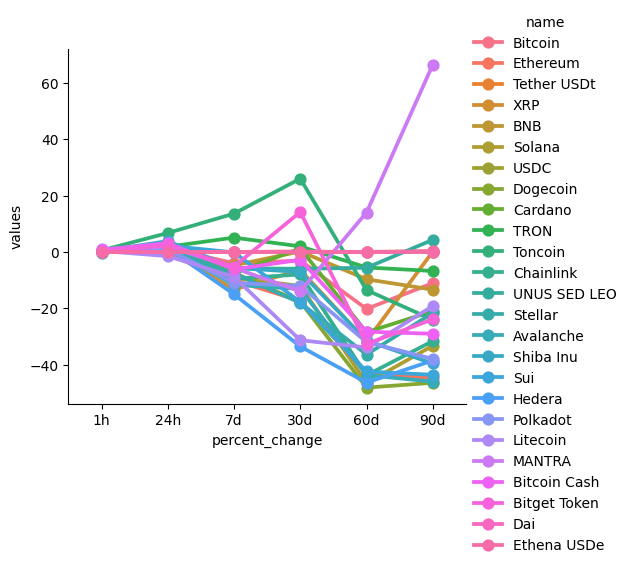

In [47]:
sns.catplot(x='percent_change', y='values', hue='name', data = df7 , kind ='point')

In [48]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,82999.12992,2025-04-01 05:03:29.004413
25,Bitcoin,83027.19058,2025-04-01 05:05:41.522406
50,Bitcoin,83045.94757,2025-04-01 05:06:41.790396
75,Bitcoin,83072.18929,2025-04-01 05:07:00.279239


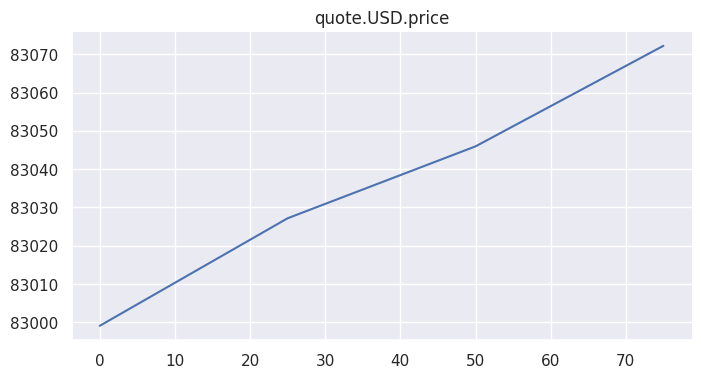

In [50]:
# @title quote.USD.price

from matplotlib import pyplot as plt
df10['quote.USD.price'].plot(kind='line', figsize=(8, 4), title='quote.USD.price')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

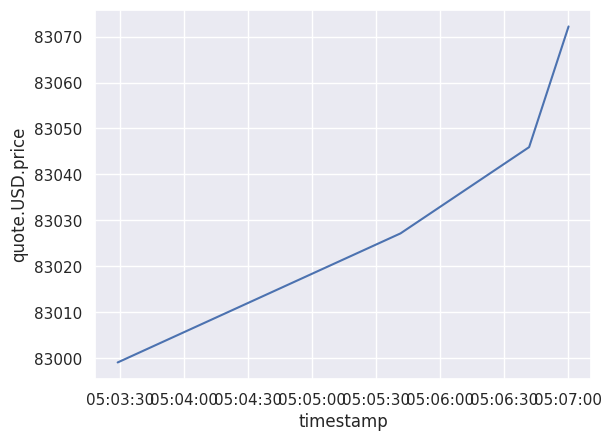

In [49]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
# from fbprophet import Prophet
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [54]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12001,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19844840.00000,19844840.00000,False,NaN,1,NaN,NaN,None,2025-04-01T05:02:00.000Z,82999.12992,27269162245.63156,57.76840,0.02399,1.37854,-4.04897,-3.09192,-20.21437,-11.11544,1647104453314.15894,61.32580,1742981728227.45996,None,2025-04-01T05:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-01 05:03:29.004413
1,1027,Ethereum,ETH,ethereum,10086,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120659504.75817,120659504.75817,True,NaN,2,NaN,NaN,None,2025-04-01T05:02:00.000Z,1836.72765,14943951182.55076,30.93110,0.08134,1.69796,-10.20734,-17.42446,-42.91565,-44.92207,221618648765.13620,8.25140,221618648765.14001,None,2025-04-01T05:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-01 05:03:29.004413
2,825,Tether USDt,USDT,tether,121855,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, waves-ec...",NaN,143992979510.88077,147877857598.03964,True,NaN,3,NaN,NaN,None,2025-04-01T05:02:00.000Z,0.99981,57482801460.47690,36.79060,-0.01257,-0.00504,-0.04821,0.03496,-0.00564,0.20292,143965164677.07074,5.36020,147849292330.14999,None,2025-04-01T05:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-01 05:03:29.004413
3,52,XRP,XRP,xrp,1569,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58205697378.00000,99986304107.00000,False,NaN,4,NaN,NaN,None,2025-04-01T05:02:00.000Z,2.10141,4075011589.55013,38.21780,0.16797,0.55665,-13.32815,-6.47486,-31.68659,0.09661,122313979500.82396,4.55410,210140905462.38000,None,2025-04-01T05:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-01 05:03:29.004413
4,1839,BNB,BNB,bnb,2433,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142471783.35000,142471783.35000,False,NaN,5,NaN,NaN,None,2025-04-01T05:02:00.000Z,609.16831,1471604649.31120,15.13300,0.04174,1.23263,-4.81664,0.13001,-9.69228,-13.42137,86789295431.19072,3.23140,86789295431.19000,None,2025-04-01T05:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-01 05:03:29.004413
5,5426,Solana,SOL,solana,863,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,512508080.45042,597537471.25662,True,NaN,6,NaN,NaN,None,2025-04-01T05:02:00.000Z,126.09514,3062240639.43019,62.98940,0.04992,0.84953,-9.34367,-12.22794,-46.55097,-33.33147,64624776456.66531,2.40610,75346569112.63000,None,2025-04-01T05:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-01 05:03:29.004413
6,3408,USDC,USDC,usd-coin,26706,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,60076009445.68934,60076009445.68934,False,NaN,7,NaN,NaN,None,2025-04-01T05:01:00.000Z,0.99997,9905364095.28869,47.38050,-0.00020,-0.00768,-0.00779,-0.00931,0.00388,0.00701,60074037183.92335,2.23620,60074037183.92000,None,2025-04-01T05:01:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-04-01 05:03:29.004413
7,74,Dogecoin,DOGE,dogecoin,1190,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,148666346383.70526,148666346383.70526,True,NaN,8,NaN,NaN,None,2025-04-01T05:02:00.000Z,0.16900,1206286119.67467,31.33720,0.29788,2.16916,-7.52779,-17.82468,-48.16262,-46.48815,25124389609.22053,0.93540,25124389609.22000,None,2025-04-01T05:02:0

In [62]:
print(df.columns)

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp'],
      dtype='object')


NameError: name 'df2' is not defined

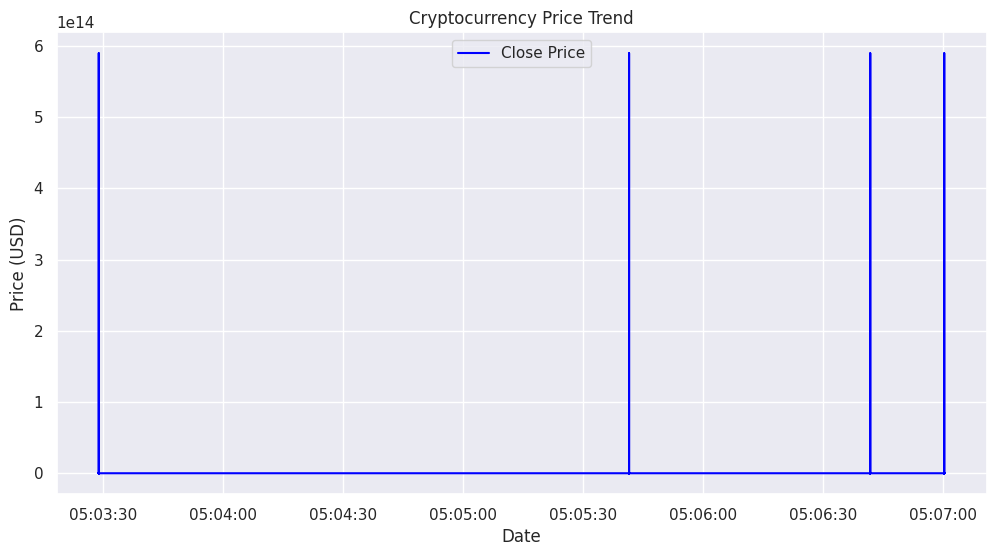

In [55]:
plt.figure(figsize=(12,6))
plt.plot(df['timestamp'], df['total_supply'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Cryptocurrency Price Trend')
plt.legend()
plt.show()


In [63]:
df.rename(columns={'quote.USD.price': 'price', 'quote.USD.volume_24h': 'volume', 'quote.USD.market_cap': 'market_cap'}, inplace=True)

In [64]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,price,volume,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12001,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19844840.00000,19844840.00000,False,NaN,1,NaN,NaN,None,2025-04-01T05:02:00.000Z,82999.12992,27269162245.63156,57.76840,0.02399,1.37854,-4.04897,-3.09192,-20.21437,-11.11544,1647104453314.15894,61.32580,1742981728227.45996,None,2025-04-01T05:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-01 05:03:29.004413
1,1027,Ethereum,ETH,ethereum,10086,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120659504.75817,120659504.75817,True,NaN,2,NaN,NaN,None,2025-04-01T05:02:00.000Z,1836.72765,14943951182.55076,30.93110,0.08134,1.69796,-10.20734,-17.42446,-42.91565,-44.92207,221618648765.13620,8.25140,221618648765.14001,None,2025-04-01T05:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-01 05:03:29.004413
2,825,Tether USDt,USDT,tether,121855,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, waves-ec...",NaN,143992979510.88077,147877857598.03964,True,NaN,3,NaN,NaN,None,2025-04-01T05:02:00.000Z,0.99981,57482801460.47690,36.79060,-0.01257,-0.00504,-0.04821,0.03496,-0.00564,0.20292,143965164677.07074,5.36020,147849292330.14999,None,2025-04-01T05:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-01 05:03:29.004413
3,52,XRP,XRP,xrp,1569,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58205697378.00000,99986304107.00000,False,NaN,4,NaN,NaN,None,2025-04-01T05:02:00.000Z,2.10141,4075011589.55013,38.21780,0.16797,0.55665,-13.32815,-6.47486,-31.68659,0.09661,122313979500.82396,4.55410,210140905462.38000,None,2025-04-01T05:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-01 05:03:29.004413
4,1839,BNB,BNB,bnb,2433,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142471783.35000,142471783.35000,False,NaN,5,NaN,NaN,None,2025-04-01T05:02:00.000Z,609.16831,1471604649.31120,15.13300,0.04174,1.23263,-4.81664,0.13001,-9.69228,-13.42137,86789295431.19072,3.23140,86789295431.19000,None,2025-04-01T05:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-01 05:03:29.004413
5,5426,Solana,SOL,solana,863,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,512508080.45042,597537471.25662,True,NaN,6,NaN,NaN,None,2025-04-01T05:02:00.000Z,126.09514,3062240639.43019,62.98940,0.04992,0.84953,-9.34367,-12.22794,-46.55097,-33.33147,64624776456.66531,2.40610,75346569112.63000,None,2025-04-01T05:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-01 05:03:29.004413
6,3408,USDC,USDC,usd-coin,26706,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,60076009445.68934,60076009445.68934,False,NaN,7,NaN,NaN,None,2025-04-01T05:01:00.000Z,0.99997,9905364095.28869,47.38050,-0.00020,-0.00768,-0.00779,-0.00931,0.00388,0.00701,60074037183.92335,2.23620,60074037183.92000,None,2025-04-01T05:01:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-04-01 05:03:29.004413
7,74,Dogecoin,DOGE,dogecoin,1190,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,148666346383.70526,148666346383.70526,True,NaN,8,NaN,NaN,None,2025-04-01T05:02:00.000Z,0.16900,1206286119.67467,31.33720,0.29788,2.16916,-7.52779,-17.82468,-48.16262,-46.48815,25124389609.22053,0.93540,25124389609.22000,None,2025-04-01T05:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04

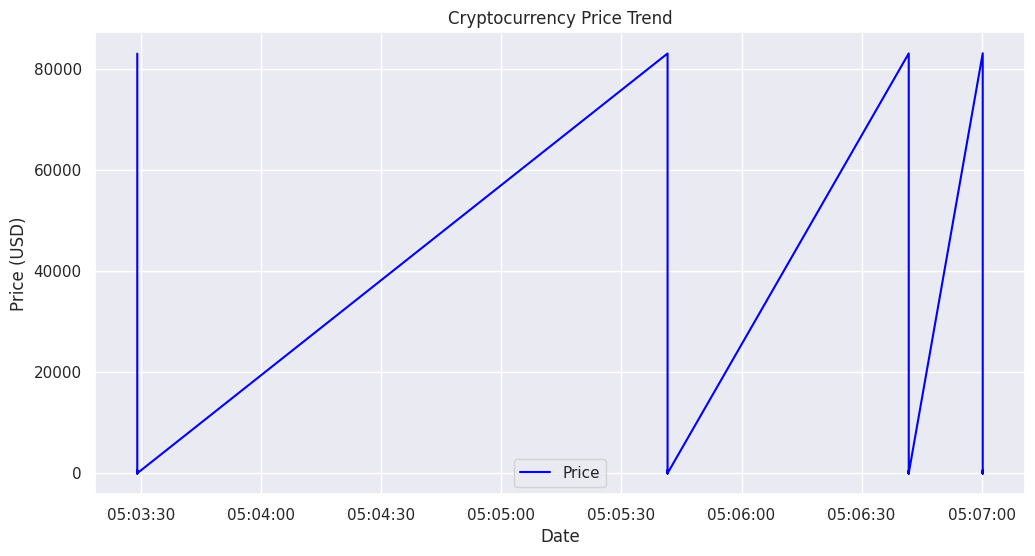

In [68]:
# EDA: Line Chart
plt.figure(figsize=(12,6))
plt.plot(df['timestamp'], df['price'], label='Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Cryptocurrency Price Trend')
plt.legend()
plt.show()


In [71]:
# EDA: Candlestick Chart
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Candlestick(x=df['last_updated'],
                open=df['price'], high=df['price'] * 1.05,
                low=df['price'] * 0.95, close=df['price'],
                name='Candlestick'))
fig.update_layout(title='Candlestick Chart', xaxis_rangeslider_visible=False)
fig.show()


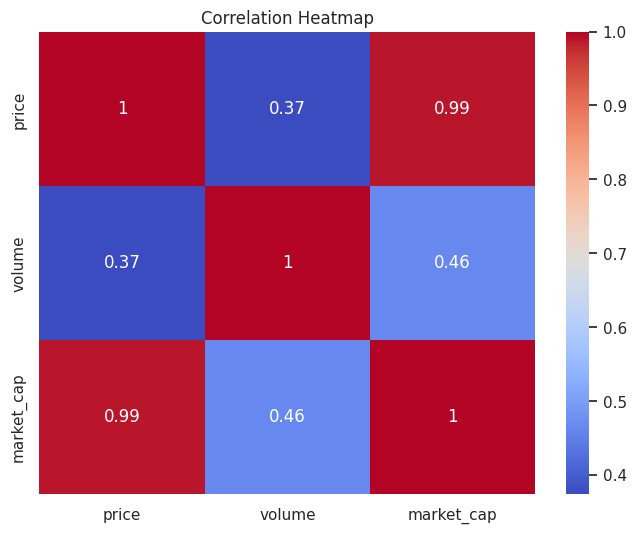

In [72]:
# EDA: Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['price', 'volume', 'market_cap']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


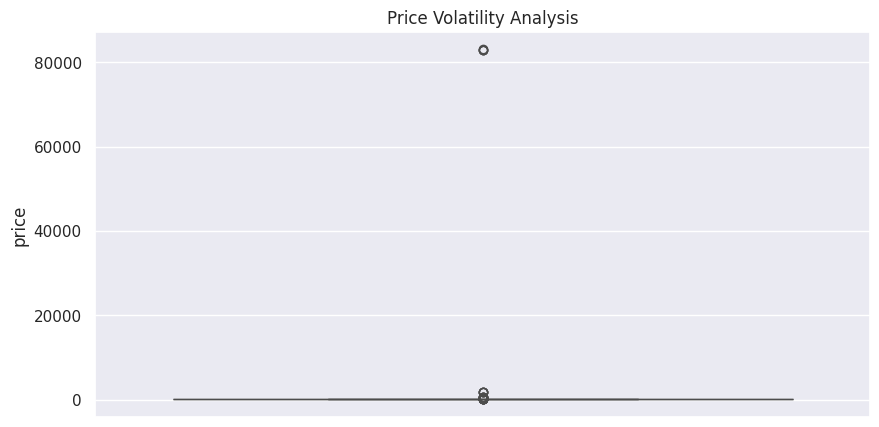

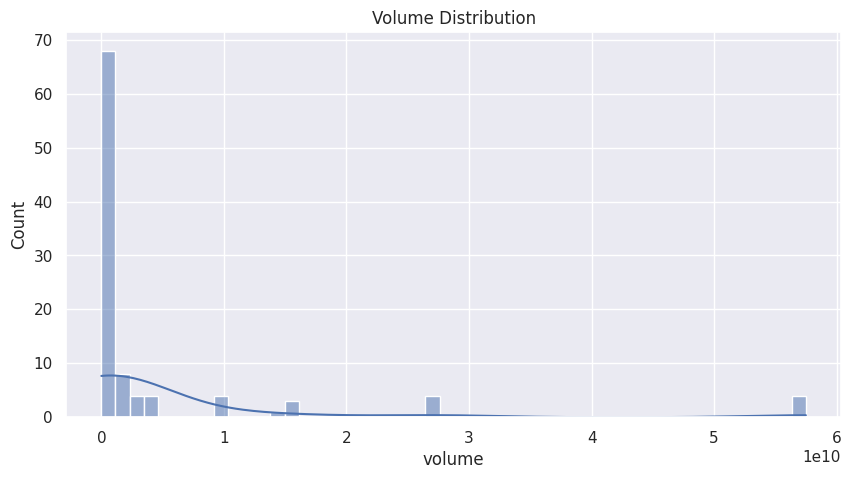

In [73]:
# EDA: Boxplot & Histogram
plt.figure(figsize=(10,5))
sns.boxplot(df['price'])
plt.title('Price Volatility Analysis')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['volume'], bins=50, kde=True)
plt.title('Volume Distribution')
plt.show()

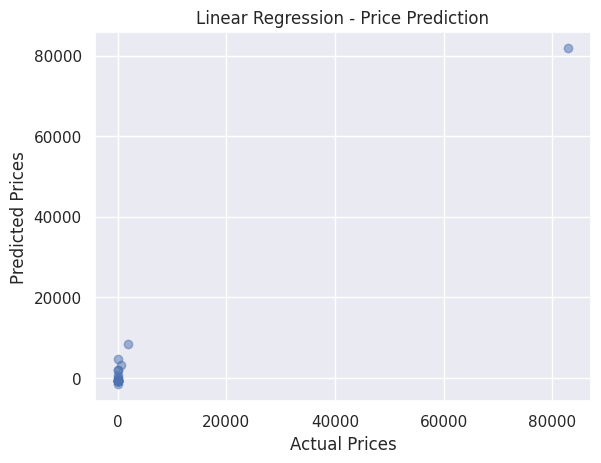

In [78]:
# Predictive Modeling: Linear Regression
X = df[['volume', 'market_cap']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression - Price Prediction')
plt.show()


In [79]:
# Predictive Modeling: Classification (Random Forest)
df['trend'] = np.where(df['quote.USD.percent_change_24h'] > 0, 1, 0)
X_class = df[['volume', 'market_cap']]
y_class = df['trend']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_c, y_train_c)
print('Random Forest Classifier Trained Successfully')


Random Forest Classifier Trained Successfully
